In [1]:
import pandas as pd
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from quantile_norm import *

raw_data = pd.read_csv('rna_data.csv', header=0, low_memory=False)
DEGs = list()
N = len(raw_data)
alpha = 0.01

# Normalization

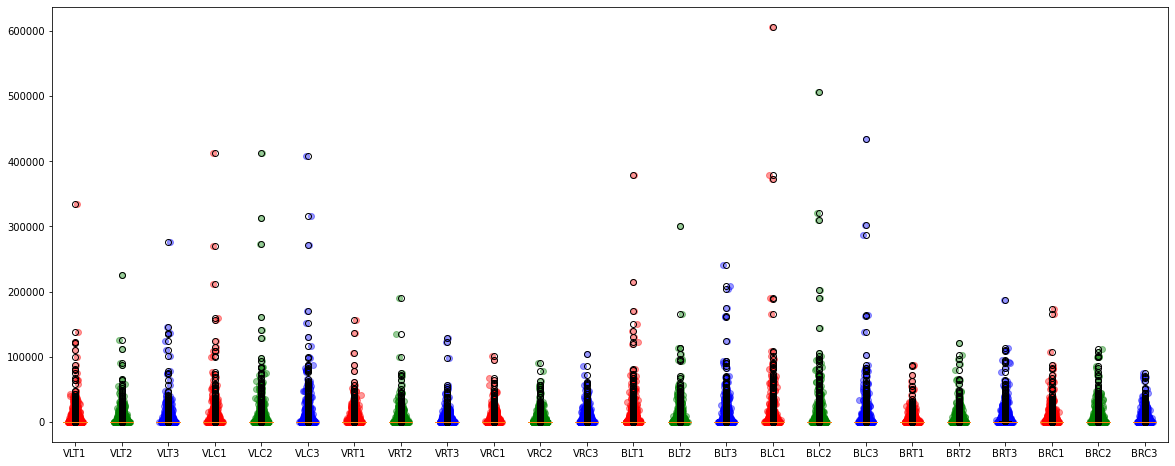

In [2]:
#graph before normalization
vals, names, xs = [],[],[]
for i, col in enumerate(raw_data[['VLT1','VLT2','VLT3','VLC1','VLC2','VLC3','VRT1','VRT2','VRT3','VRC1','VRC2','VRC3','BLT1','BLT2','BLT3','BLC1','BLC2','BLC3','BRT1','BRT2','BRT3','BRC1','BRC2','BRC3']]):
    vals.append(raw_data[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, raw_data[col].values.shape[0]))

color_list = ['r','g', 'b'] * 8
plt.figure(figsize=(20,8))
plt.boxplot(vals, labels=names)
for x, val, c in zip(xs, vals, color_list):
    plt.scatter(x, val, alpha=0.4, color = c)
plt.show()

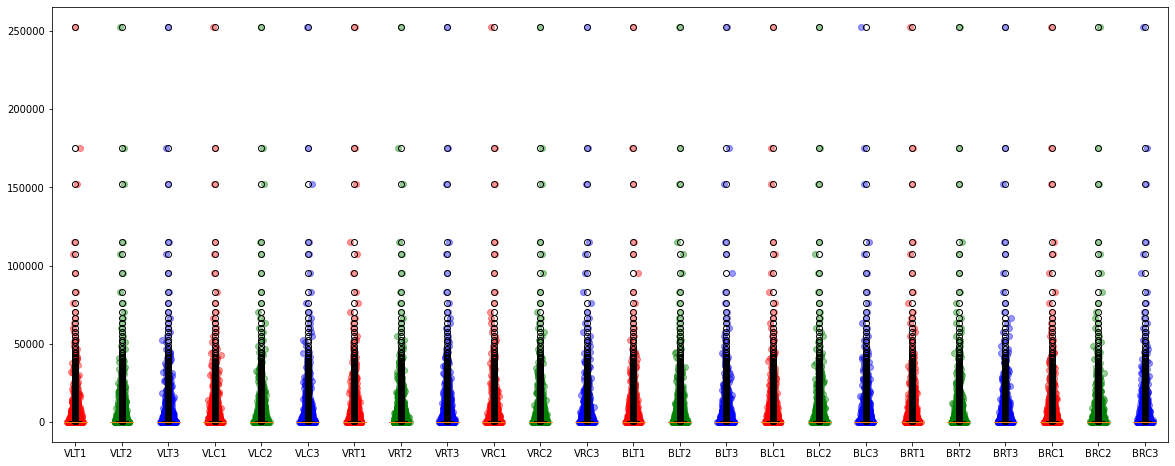

In [3]:
# normalization
GenIDs = raw_data['GenID']
raw_data = quantileNormalize(raw_data)
raw_data['GenID'] = GenIDs
raw_data

#graph After normalization
vals, names, xs = [],[],[]
for i, col in enumerate(raw_data[['VLT1','VLT2','VLT3','VLC1','VLC2','VLC3','VRT1','VRT2','VRT3','VRC1','VRC2','VRC3','BLT1','BLT2','BLT3','BLC1','BLC2','BLC3','BRT1','BRT2','BRT3','BRC1','BRC2','BRC3']]):
    vals.append(raw_data[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, raw_data[col].values.shape[0]))

color_list = ['r','g', 'b','r','g', 'b'] * 4
plt.figure(figsize=(20,8))
plt.boxplot(vals, labels=names)
for x, val, c in zip(xs, vals, color_list):
    plt.scatter(x, val, alpha=0.4, color = c)
plt.show()

# VLT vs VLC Comparison

In [4]:
df = raw_data[['GenID','VLT1','VLT2','VLT3','VLC1','VLC2','VLC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['VLT1','VLT2','VLT3']].to_numpy()
data_set2 = df[['VLC1','VLC2','VLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
VL_DEG = df['GenID'].to_list()
df


<ipython-input-4-7dac565268b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,VLT1,VLT2,VLT3,VLC1,VLC2,VLC3,p_value,rank,BH_crit_value
27151,Os05g49300,950.541667,934.958333,979.625000,214.416667,234.333333,236.708333,0.000001,27152,0.004866
44665,Os10g38110,4450.625000,4370.166667,4383.416667,5839.708333,5890.333333,5900.208333,0.000001,44666,0.008005
54628,Os12g29400,823.541667,776.791667,785.541667,102.583333,120.333333,113.375000,0.000001,54629,0.009790
29257,Os06g14470,650.250000,660.916667,660.958333,511.250000,513.291667,508.833333,0.000003,29258,0.005243
13618,Os03g09840,535.791667,522.958333,519.541667,310.875000,305.916667,298.875000,0.000003,13619,0.002441
...,...,...,...,...,...,...,...,...,...,...
55599,Os12g41810,375.583333,343.541667,465.833333,562.458333,564.375000,603.083333,0.009545,55600,0.009964
54907,Os12g33160,404.208333,482.000000,504.458333,664.250000,645.500000,594.875000,0.009593,54908,0.009840
55656,Os12g42530,6.750000,5.125000,6.208333,18.875000,19.125000,29.583333,0.009778,55657,0.009974
55318,Os12g38210,2513.041667,2807.375000,2239.833333,1741.541667,1797.541667,1725.166667,0.009814,55319,0.009914


# VRT vs VRC

In [5]:
df = raw_data[['GenID','VRT1','VRT2','VRT3','VRC1','VRC2','VRC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['VRT1','VRT2','VRT3']].to_numpy()
data_set2 = df[['VRC1','VRC2','VRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
VR_DEG = df['GenID'].to_list()
df


<ipython-input-5-deb03324863a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,VRT1,VRT2,VRT3,VRC1,VRC2,VRC3,p_value,rank,BH_crit_value
28129,Os06g47910,65.041667,62.958333,64.416667,7.541667,9.000000,8.708333,2.087215e-07,28130,0.005041
51315,Os11g41890,1954.625000,1951.000000,1944.083333,2196.375000,2204.083333,2209.125000,7.898596e-07,51316,0.009196
29373,Os06g15910,165.291667,167.291667,164.000000,435.250000,444.791667,454.041667,9.073739e-07,29374,0.005264
31997,Os06g50650,5.416667,3.041667,7.833333,75.000000,76.291667,74.125000,1.350956e-06,31998,0.005734
29840,Os06g22410,0.000000,0.000000,0.000000,2.791667,2.958333,2.750000,1.522683e-06,29841,0.005348
...,...,...,...,...,...,...,...,...,...,...
51025,Os11g38220,2.291667,4.333333,3.333333,0.000000,0.791667,0.000000,9.094310e-03,51026,0.009144
51831,Os12g16280,8030.416667,7742.875000,8990.000000,6223.500000,5890.333333,4909.416667,9.114133e-03,51832,0.009289
54771,Os12g31380,496.541667,532.750000,534.833333,465.958333,441.916667,455.333333,9.298256e-03,54772,0.009816
53137,Os12g08930,11.583333,10.541667,15.208333,3.833333,5.916667,5.666667,9.412294e-03,53138,0.009523


# BLT vs BLC

In [6]:
#BLT1,BLT2,BLT3,BLC1,BLC2,BLC3
df = raw_data[['GenID','BLT1','BLT2','BLT3','BLC1','BLC2','BLC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['BLT1','BLT2','BLT3']].to_numpy()
data_set2 = df[['BLC1','BLC2','BLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
BL_DEG = df['GenID'].to_list()
df


<ipython-input-6-74adb4830dfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,BLT1,BLT2,BLT3,BLC1,BLC2,BLC3,p_value,rank,BH_crit_value
32648,Os07g35750,40.625000,45.500000,36.125000,174.583333,168.416667,170.041667,0.000002,32649,0.005851
10882,Os02g46030,1103.416667,1087.125000,1037.250000,1821.083333,1816.833333,1813.166667,0.000003,10883,0.001950
1778,Os01g08690,128.791667,129.333333,129.083333,114.791667,115.958333,115.583333,0.000004,1779,0.000319
34328,Os07g20340,20.125000,13.916667,22.250000,119.708333,118.958333,115.583333,0.000004,34329,0.006152
34509,Os07g23640,359.916667,379.458333,364.208333,76.875000,79.625000,53.791667,0.000008,34510,0.006184
...,...,...,...,...,...,...,...,...,...,...
52613,Os12g02160,5.000000,3.291667,2.416667,0.000000,0.000000,0.000000,0.009270,52614,0.009429
53815,Os12g17610,5.000000,1.291667,7.416667,12.875000,13.708333,12.583333,0.009439,53816,0.009644
53744,Os12g16770,0.500000,0.250000,0.000000,0.875000,1.000000,0.958333,0.009572,53745,0.009632
55727,Os12g43450,334.875000,191.791667,343.916667,23.625000,27.958333,82.000000,0.009596,55728,0.009987


# BRT vs BRC

In [7]:
#BLT1,BLT2,BLT3,BLC1,BLC2,BLC3
df = raw_data[['GenID','BRT1','BRT2','BRT3','BRC1','BRC2','BRC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['BRT1','BRT2','BRT3']].to_numpy()
data_set2 = df[['BRC1','BRC2','BRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
BR_DEG = df['GenID'].to_list()
df


<ipython-input-7-2f463fcd7a1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,BRT1,BRT2,BRT3,BRC1,BRC2,BRC3,p_value,rank,BH_crit_value
4667,Os01g50070,210.333333,208.291667,221.125000,34.375000,29.083333,39.125000,0.000003,4668,0.000837
20788,Os04g32830,130.666667,136.166667,133.333333,244.583333,253.208333,244.208333,0.000004,20789,0.003726
49126,Os11g10280,3.375000,3.166667,3.208333,0.291667,0.083333,0.000000,0.000008,49127,0.008804
1823,Os01g09252,634.375000,621.291667,623.250000,483.375000,479.291667,472.500000,0.000009,1824,0.000327
17054,Os03g58900,185.500000,179.375000,178.500000,118.500000,119.083333,118.583333,0.000009,17055,0.003056
...,...,...,...,...,...,...,...,...,...,...
54579,Os12g28770,955.375000,950.083333,1351.833333,458.000000,349.583333,472.500000,0.008932,54580,0.009781
51874,Os12g39420,1691.083333,1863.875000,1630.750000,1405.625000,1390.958333,1396.125000,0.009109,51875,0.009296
53335,Os12g11550,1.458333,2.666667,3.208333,0.000000,0.000000,0.000000,0.009132,53336,0.009558
54838,Os12g32280,39.916667,29.875000,40.375000,53.583333,66.166667,60.875000,0.009357,54839,0.009828


In [8]:
DEGs = list(set(VL_DEG) or set(VR_DEG) or set(BL_DEG) or set(BR_DEG))
print('Genes singificant in at least 1 Experiment: ',len(DEGs))

common_DEGs = list(set(VL_DEG) and set(VR_DEG) and set(BL_DEG) and set(BR_DEG))
print('Genes singificant in all Experiments: ',len(common_DEGs))

df = raw_data[raw_data.GenID.isin(DEGs)]
df

Genes singificant in at least 1 Experiment:  2055
Genes singificant in all Experiments:  747


,GenID,VLT1,VLT2,VLT3,VLC1,VLC2,VLC3,VRT1,VRT2,VRT3,...,BLT3,BLC1,BLC2,BLC3,BRT1,BRT2,BRT3,BRC1,BRC2,BRC3
967,Os01g61044,87.583333,70.666667,72.083333,246.250000,249.166667,229.416667,83.041667,98.375000,60.708333,...,144.083333,265.791667,270.166667,288.250000,59.000000,62.916667,61.041667,190.333333,108.750000,62.750000
987,Os01g62440,1944.791667,1950.375000,2118.500000,2899.208333,2927.000000,3034.416667,464.791667,424.791667,503.083333,...,1922.041667,2962.708333,3077.333333,2687.041667,397.458333,477.708333,334.666667,332.500000,443.416667,469.625000
1179,Os01g74280,1163.458333,1209.291667,1167.833333,1554.916667,1605.000000,1595.916667,826.083333,941.666667,907.166667,...,1281.250000,1685.708333,1811.416667,1841.416667,925.791667,934.791667,934.791667,1072.750000,1045.750000,996.666667
1305,Os01g02550,92.250000,99.125000,96.041667,184.375000,198.750000,182.958333,0.000000,0.000000,0.000000,...,314.416667,278.333333,204.583333,242.875000,1.458333,0.125000,2.041667,2.125000,0.083333,0.333333
1433,Os01g04260,337.666667,318.208333,386.791667,659.416667,633.625000,625.000000,1091.791667,960.625000,986.250000,...,655.708333,889.500000,835.708333,805.666667,1156.500000,1054.458333,1102.083333,784.625000,971.750000,1147.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55772,Os12g44020,324.583333,363.958333,291.291667,600.958333,485.708333,648.791667,1515.375000,1748.000000,1273.291667,...,335.500000,604.041667,821.958333,612.458333,1406.125000,1573.416667,2085.916667,2565.541667,2850.750000,1851.916667
55774,Os12g44040,296.916667,279.083333,259.125000,365.375000,461.833333,443.416667,196.500000,225.708333,194.500000,...,389.916667,510.666667,507.500000,488.083333,211.833333,243.791667,263.916667,220.500000,193.916667,159.916667
55776,Os12g44060,91.083333,98.291667,115.375000,167.708333,169.583333,141.333333,262.416667,374.041667,272.875000,...,87.750000,156.500000,124.375000,156.291667,228.583333,298.666667,361.625000,527.416667,422.250000,294.166667
55791,Os12g44260,3.958333,8.083333,4.666667,12.458333,11.291667,11.750000,4.166667,4.333333,4.291667,...,13.208333,9.291667,11.875000,19.166667,9.208333,4.625000,6.416667,14.083333,15.125000,4.041667


In [9]:
# Finding folds:
df['VL_fold'] = np.log2(df[['VLT1','VLT2','VLT3']].mean(axis=1) / df[['VLC1','VLC2','VLC3']].mean(axis=1))
df['VR_fold'] = np.log2(df[['VRT1','VRT2','VRT3']].mean(axis=1) / df[['VRC1','VRC2','VRC3']].mean(axis=1))
df['BL_fold'] = np.log2(df[['BLT1','BLT2','BLT3']].mean(axis=1) / df[['BLC1','BLC2','BLC3']].mean(axis=1))
df['BR_fold'] = np.log2(df[['BRT1','BRT2','BRT3']].mean(axis=1) / df[['BRC1','BRC2','BRC3']].mean(axis=1))

df = df[['GenID','VL_fold','VR_fold','BL_fold','BR_fold']]
df = df.set_index('GenID')
df

C:\Users\DHRUBO\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-9-c317bb5e38fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VL_fold'] = np.log2(df[['VLT1','VLT2','VLT3']].mean(axis=1) / df[['VLC1','VLC2','VLC3']].mean(axis=1))
<ipython-input-9-c317bb5e38fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VR_fold'] = np.log2(df[['VRT1',

,VL_fold,VR_fold,BL_fold,BR_fold
GenID,,,,
Os01g61044,-1.653926,-0.819750,-0.854503,-0.983810
Os01g62440,-0.559164,0.109454,-0.180985,-0.041965
Os01g74280,-0.425711,-0.220992,-0.384315,-0.156268
Os01g02550,-0.977871,NaN,-0.285656,0.512206
Os01g04260,-0.879356,0.080441,-0.341712,0.190425
...,...,...,...,...
Os12g44020,-0.824708,-1.150729,-1.036947,-0.520907
Os12g44040,-0.605474,0.119227,-0.444741,0.325190
Os12g44060,-0.651270,-0.946911,-0.864899,-0.484741


<AxesSubplot:ylabel='GenID'>

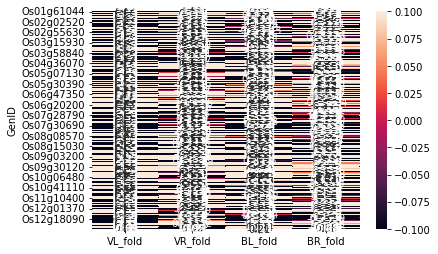

In [11]:
# heatmap to show the fold change in differentially expressed genes. 
import seaborn as sns
sns.heatmap(df, annot=True)

<AxesSubplot:ylabel='GenID'>

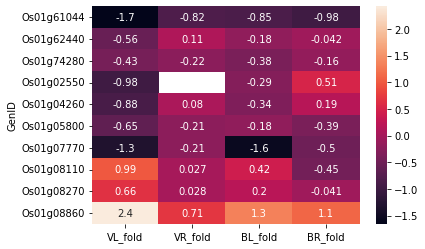

In [12]:
sns.heatmap(df.head(10), annot=True)

# Bonus Task

In [13]:
from Bio import pairwise2 as pw2
from Bio import SeqIO

# reading data
fhand = open('Os03t0752300-01.fasta')
tpkaseq = ''
for line in fhand.readlines():
    if line.startswith('>'):
        continue    
    tpkaseq += line.strip()

#print(len(tpkaseq))


OS_dict = SeqIO.to_dict(SeqIO.parse("o_sativa.fasta", "fasta"))

def HomologyCount(seq):
    score = pw2.align.globalxx(seq, tpkaseq)[0][2]
    return score/max(len(seq), 1672)

In [ ]:
SimilarToK2P = list()

for gene in common_DEGs:
    gene_id = 'LOC_'+str(gene)+'.1'
    if gene_id in OS_dict.keys():
        homo_count = HomologyCount(str(OS_dict[gene_id].seq))
        #print(gene_id,' has a ',round(homo_count*100,2),'% match',sep='')
        if homo_count > 0.6:
            print(gene,' has a ',round(homo_count*100,2),'% match',sep='')
            SimilarToK2P.append(gene)


In [15]:
len(SimilarToK2P)

110

In [ ]:
SimilarToK2P = list()

for gene in DEGs:
    gene_id = 'LOC_'+str(gene)+'.1'
    if gene_id in OS_dict.keys():
        homo_count = HomologyCount(str(OS_dict[gene_id].seq))
        #print(gene_id,' has a ',round(homo_count*100,2),'% match',sep='')
        if homo_count > 0.6:
            print(gene,' has a ',round(homo_count*100,2),'% match',sep='')
            SimilarToK2P.append(gene)


In [17]:
len(SimilarToK2P)

341